In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
import geopandas as gpd

## Exploring the Mango Lassi Mystery: My First Survey Adventure! 🍹✨

#### Ever since I moved to Vienna, I’ve been fascinated by the popularity of Mango Lassi in Europe. 🤔 Why do people love this drink so much? What’s the secret behind its charm?
#### To uncover the mystery, my friend and I went on an exciting expedition at an Asian food festival. We conducted a physical survey with around 200 attendees


In [8]:
data = pd.read_excel(r'D:\Assignments&UNI\Mango Lassi Survey.xlsx', sheet_name= 'Sheet 1')

In [66]:
data.head()

,Timestamp,Gender,Age Group,Country,Ethnicity,Do you like to try different cuisine?,Do you like yogurt if yes then Dairy based or vegan?,Have you ever Heard about the Mango Lassi?,How much would you rate Mango Lassi ?,"Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?",Unnamed: 10,If this Product is available in supermarket how much are you willing to pay?,"Feedback on taste, texture, etc.",If this Product is available in supermarket how much are you willing to pay?.1,If this Product is available in supermarket how much are you willing to pay?.2,If this Product is available in supermarket how much are you willing to pay?.3,Cleaned Response,Specific Cuisine,Price Range
0,2024-05-18 15:56:08.048,Male,Below 18 Years,India,Indian,Yes,"Yes, Dairy",Yes,10,Yes,NaN,2.0,Sehr gut,2.0,2,2,Yes,alles,2.00
1,2024-05-18 17:17:07.898,Female,45 - 60 Years,Austria,Austrian,Yes,"Yes, Vegan",Yes,10,"Yes,Italian",Italian,3.0,More fruit,3.0,3,3,Yes,"yes,italian",3.00
2,2024-05-18 17:26:28.304,Male,45 - 60 Years,Europe,European,Yes,"Yes, Dairy",Yes,6,No,NaN,1.5,Pulver constience okay more flavour,1.5,2,2,No,None,1.75
3,2024-05-18 17:29:18.455,Female,18 - 30 Years,Switzerland,Swiss,Yes,"Yes, Dairy",Yes,9,Mexican spicy,Mexican spicy,3.0,Like,3.0,3,3,Yes,mexican spicy,3.00
4,2024-05-18 17:31:50.183,Male,30 - 45 Years,Austria,Austrian,Yes,"Yes, Vegan",Yes,7,Any,Any,3.0,More mango taste,3.0,3,3,Yes,any,3.00


### Data cleaning
#### Removed white spaces in the Data to make it uniform.

In [10]:
data.columns = data.columns.str.strip()
data['Ethnicity'] = data['Ethnicity'].str.strip()

In [11]:
print(data.columns)

Index(['Timestamp', 'Gender', 'Age Group', 'Country', 'Ethnicity',
       'Do you like to try different cuisine?',
       'Do you like yogurt if yes then Dairy based or vegan?',
       'Have you ever Heard about the Mango Lassi?',
       'How much would you rate Mango Lassi ?',
       'Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?',
       'Unnamed: 10',
       'If this Product is available in supermarket how much are you willing to pay?',
       'Feedback on taste, texture, etc.',
       'If this Product is available in supermarket how much are you willing to pay?.1',
       'If this Product is available in supermarket how much are you willing to pay?.2',
       'If this Product is available in supermarket how much are you willing to pay?.3'],
      dtype='object')


In [12]:
country = data['Ethnicity']

In [18]:
country_counts= country.value_counts()
country_counts

Ethnicity
Austrian     60
German       24
Italian       8
Thai          8
Indian        6
             ..
Iranian       1
Dutch         1
Finnish       1
Slovenian     1
italian       1
Name: count, Length: 65, dtype: int64

In [25]:
data['Gender'].value_counts()


Gender
Male      99
Female    99
Other      2
Name: count, dtype: int64

# Age and Gender data of the Survey Participants
#### After loading the dataset, I tried to create a bar chart based on the gender and age group data of our Survey participants
#### The majority of participants were between *18-30* and *30-45 years old*.

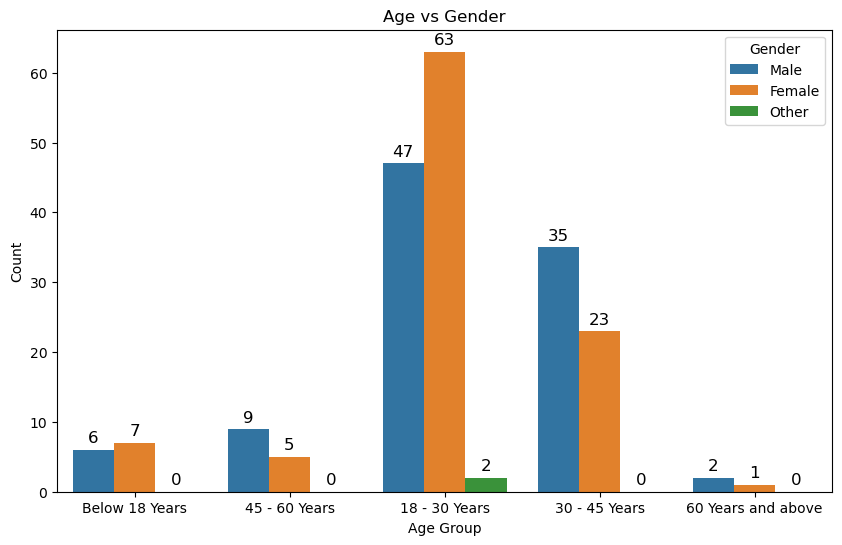

In [26]:
# Plot the countplot with the specified order
plt.figure(figsize=(10,6))
ax = sns.countplot(data, x='Age Group', hue='Gender')

# Annotate the bars with counts
for p in ax.patches:
    height = int(p.get_height())  # Get the height of the bar
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Customize the plot
plt.title('Age vs Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

### Boxplot for Ratings
#### Here i created a boxplot based on the ratings given by the partcipants
#### Female rated at a median value of 9, For Men it was 8 and Others voted it at 8.5 approx

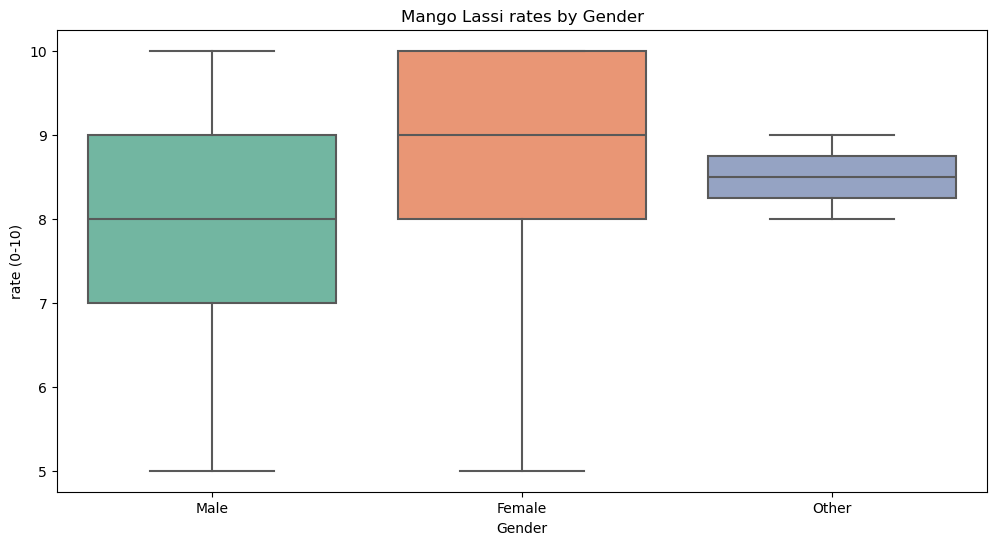

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Gender', y='How much would you rate Mango Lassi ?', palette='Set2')
plt.title('Mango Lassi rates by Gender')
plt.xlabel('Gender')
plt.ylabel('rate (0-10)')
plt.show()

#### Created a countplot, asking people whether they knew about Mango Lassi before based on the age categories

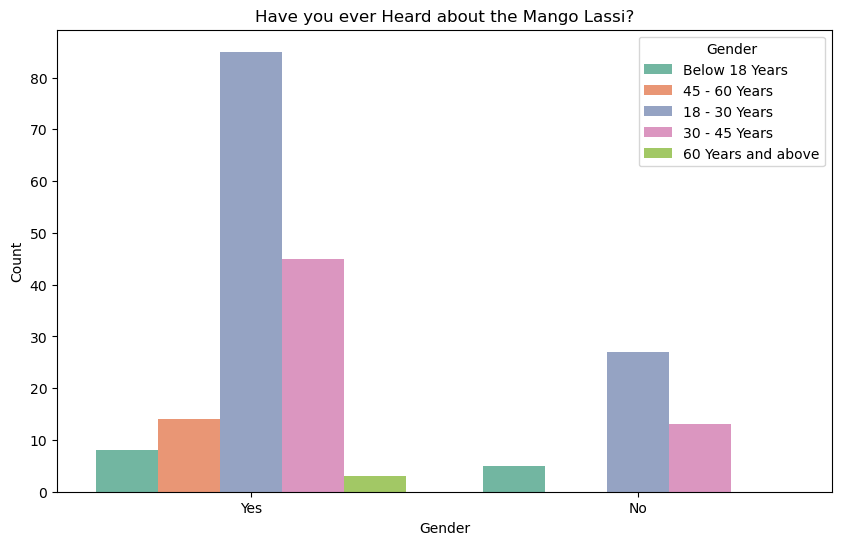

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(data, x='Have you ever Heard about the Mango Lassi?', hue='Age Group', palette= 'Set2')
plt.title('Have you ever Heard about the Mango Lassi?')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [32]:
counts = data.groupby(['Age Group', 'Have you ever Heard about the Mango Lassi?']).size().unstack().fillna(0)
age_order = ['Below 18 Years', '18 - 30 Years', '30 - 45 Years', '45 - 60 Years', '60 Years and above']
counts = counts.reindex(age_order)
counts

Have you ever Heard about the Mango Lassi?,No,Yes
Age Group,,
Below 18 Years,5.0,8.0
18 - 30 Years,27.0,85.0
30 - 45 Years,13.0,45.0
45 - 60 Years,0.0,14.0
60 Years and above,0.0,3.0


## Countplot on the answer of "Have you Heard about Mango Lassi before?"
#### Created a countplot of people who heard about Mango Lassi and who didn't know about it 

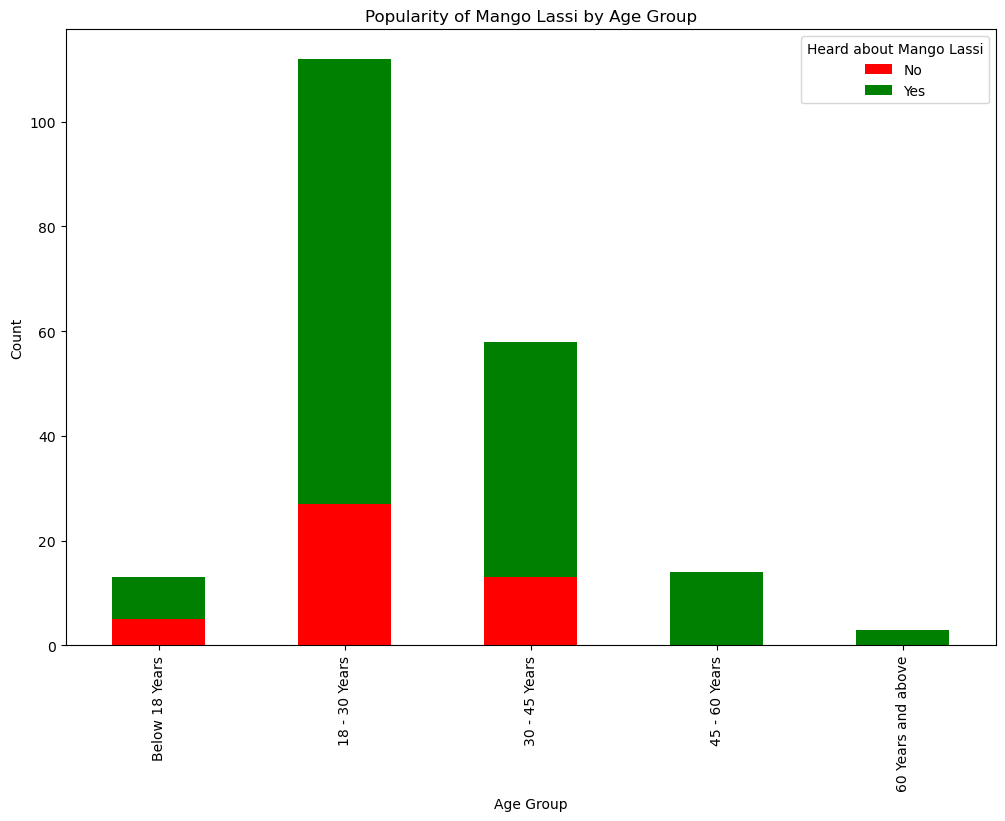

In [33]:
# Plotting
ax_1 = counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])
plt.title('Popularity of Mango Lassi by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Heard about Mango Lassi', labels=['No', 'Yes'])
plt.show()

## Stacked bar chart based on the answer to the question "Have you Heard about Mango Lassi before?"
### The previous plot was difficult to comprehend so i went on with this one to better understand the data

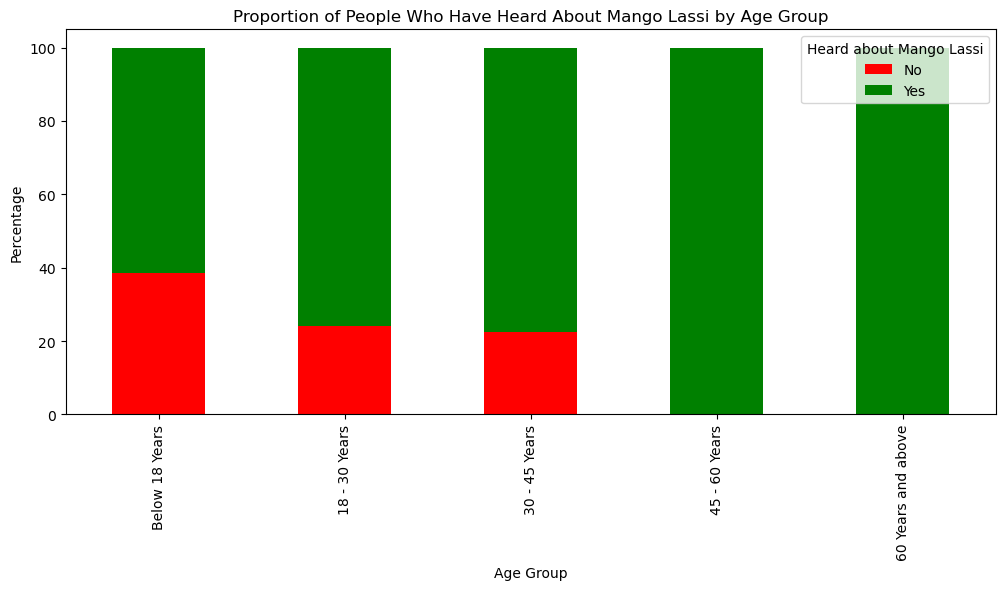

In [67]:
prop_data = counts
prop_data = prop_data.div(prop_data.sum(axis=1), axis=0) * 100

# Plotting
prop_data.plot(kind='bar', stacked=True, figsize=(12, 5), color=['Red', 'Green'])
plt.title('Proportion of People Who Have Heard About Mango Lassi by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage')
plt.legend(title='Heard about Mango Lassi', labels=['No', 'Yes'])
plt.show()

### Data cleaning
#### As the response to the question 'Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?', 
#### was yes, and the cuisine or the cuisine itself or no, i had the standardize the answers to Yes or No

In [35]:
# Define the function to standardize responses
def clean_responses(response):
    if pd.isna(response):
        return 'No'
    response = str(response).strip().lower()
    if response in ['yes', 'no']:
        return response.capitalize()
    else:
        return 'Yes'

# Apply the function to the relevant column
data['Cleaned Response'] = data['Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?'].apply(clean_responses)

In [36]:
data['Cleaned Response'].value_counts()

Cleaned Response
Yes    175
No      25
Name: count, dtype: int64

In [46]:
data.head()

,Timestamp,Gender,Age Group,Ethnicity,Do you like to try different cuisine?,Do you like yogurt if yes then Dairy based or vegan?,Have you ever Heard about the Mango Lassi?,How much would you rate Mango Lassi ?,"Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?",If this Product is available in supermarket how much are you willing to pay?,"Feedback on taste, texture, etc.",If this Product is available in supermarket how much are you willing to pay?.1,If this Product is available in supermarket how much are you willing to pay?.2,If this Product is available in supermarket how much are you willing to pay?.3,Cleaned Response
0,2024-05-18 15:56:08.048,Male,Below 18 Years,Indian,Yes,"Yes, Dairy",Yes,10,Yes,2.0,Sehr gut,2.0,2,2,Yes
1,2024-05-18 17:17:07.898,Female,45 - 60 Years,Austrian,Yes,"Yes, Vegan",Yes,10,Italian,3.0,More fruit,3.0,3,3,Yes
2,2024-05-18 17:26:28.304,Male,45 - 60 Years,European,Yes,"Yes, Dairy",Yes,6,No,1.5,Pulver constience okay more flavour,1.5,2,2,No
3,2024-05-18 17:29:18.455,Female,18 - 30 Years,Swiss,Yes,"Yes, Dairy",Yes,9,Mexican spicy,3.0,Like,3.0,3,3,Yes
4,2024-05-18 17:31:50.183,Male,30 - 45 Years,Austrian,Yes,"Yes, Vegan",Yes,7,Any,3.0,More mango taste,3.0,3,3,Yes


### Data Cleaning 
#### Some people replied just with a yes for bringing mango lassi to all cuisines so i changed the Yes to Alles here which means All Cuisines

In [38]:
def process_response(response):
    if pd.isna(response):
        return None
    response = str(response).strip().lower()
    if response == 'yes':
        return 'Alles'
    elif response == 'no':
        return None
    else:
        return response

# Apply the function to the relevant column to create the Specific Cuisine column
data['Specific Cuisine'] = data['Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?'].apply(process_response)



In [48]:
data.head()

,Timestamp,Gender,Age Group,Ethnicity,Do you like to try different cuisine?,Do you like yogurt if yes then Dairy based or vegan?,Have you ever Heard about the Mango Lassi?,How much would you rate Mango Lassi ?,"Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?",If this Product is available in supermarket how much are you willing to pay?,"Feedback on taste, texture, etc.",If this Product is available in supermarket how much are you willing to pay?.1,If this Product is available in supermarket how much are you willing to pay?.2,If this Product is available in supermarket how much are you willing to pay?.3,Cleaned Response,Specific Cuisine
0,2024-05-18 15:56:08.048,Male,Below 18 Years,Indian,Yes,"Yes, Dairy",Yes,10,Yes,2.0,Sehr gut,2.0,2,2,Yes,Alles
1,2024-05-18 17:17:07.898,Female,45 - 60 Years,Austrian,Yes,"Yes, Vegan",Yes,10,Italian,3.0,More fruit,3.0,3,3,Yes,italian
2,2024-05-18 17:26:28.304,Male,45 - 60 Years,European,Yes,"Yes, Dairy",Yes,6,No,1.5,Pulver constience okay more flavour,1.5,2,2,No,None
3,2024-05-18 17:29:18.455,Female,18 - 30 Years,Swiss,Yes,"Yes, Dairy",Yes,9,Mexican spicy,3.0,Like,3.0,3,3,Yes,mexican spicy
4,2024-05-18 17:31:50.183,Male,30 - 45 Years,Austrian,Yes,"Yes, Vegan",Yes,7,Any,3.0,More mango taste,3.0,3,3,Yes,any


In [39]:
data['Specific Cuisine'] = data['Specific Cuisine'].apply(lambda x: x.strip().lower() if isinstance(x, str) else x)
data['Specific Cuisine'].value_counts()


Specific Cuisine
alles                           60
asian                           13
spicy                            9
thai                             3
burger                           3
                                ..
italian austrian                 1
rice                             1
donner, spicy, fried chicken     1
burger, turkish, thai            1
yes, any                         1
Name: count, Length: 83, dtype: int64

### This plot was about asking people at what cuisine places they like to get mango lassi based on gender

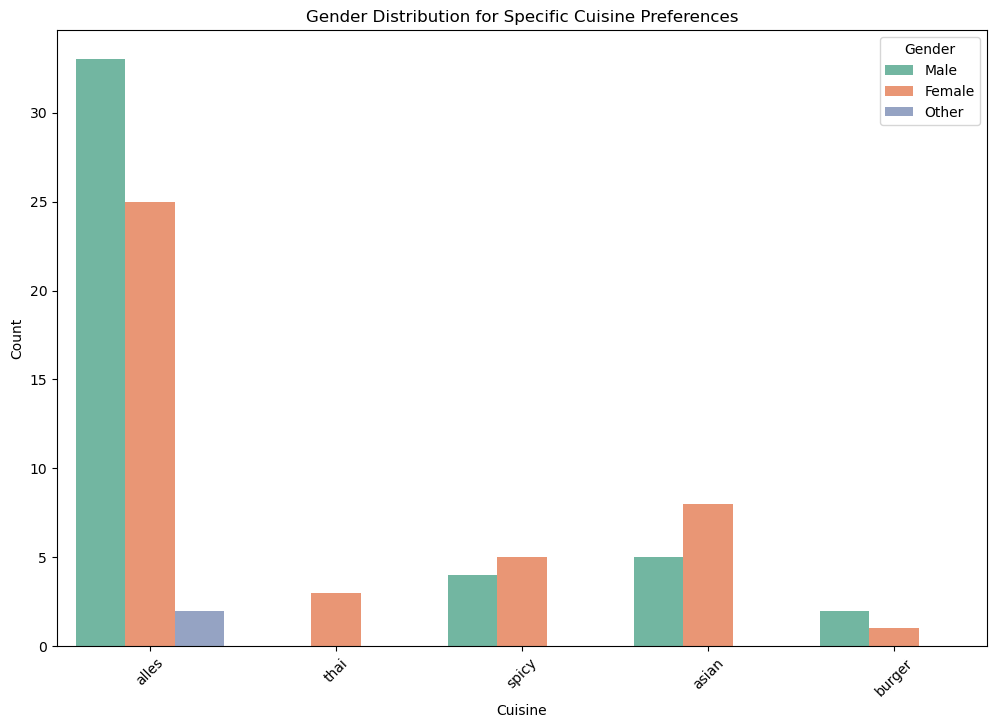

In [68]:
c_c = data['Specific Cuisine'].value_counts()

# Filter out cuisines with counts below the threshold
threshold = 3
filtered_cuisines = c_c[c_c >= threshold].index
filtered_data = data[data['Specific Cuisine'].isin(filtered_cuisines)]

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Specific Cuisine', hue='Gender', palette='Set2')
plt.title('Gender Distribution for Specific Cuisine Preferences')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### This plot Was about asking people at what cuisine places they like to get mango lassi based on age

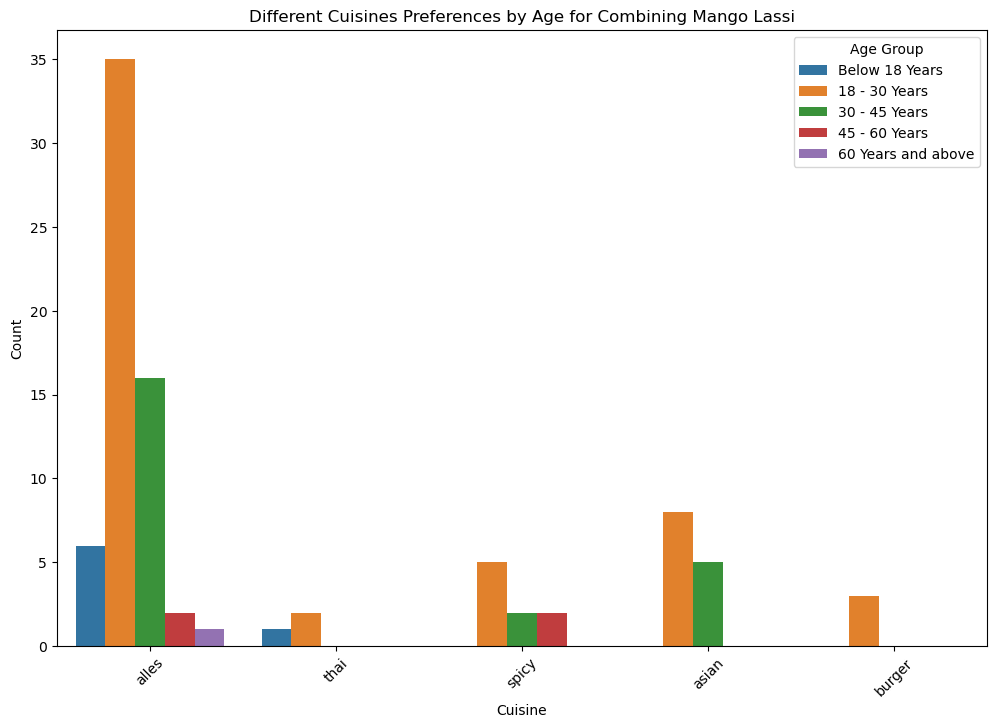

In [41]:
plt.figure(figsize=(12, 8))
sns.countplot(data=filtered_data, x='Specific Cuisine', hue='Age Group')
plt.title('Different Cuisines Preferences by Age for Combining Mango Lassi')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

### Data Cleaning 
#### As people here answered the question to supermarket price question with a lower threshold and a higher threshold we had to average that out for simplification
### Then created a boxplot median prices people might be willing to pay for mango lassi in supermarkets, 
##### the median data says it should be around 3 euros


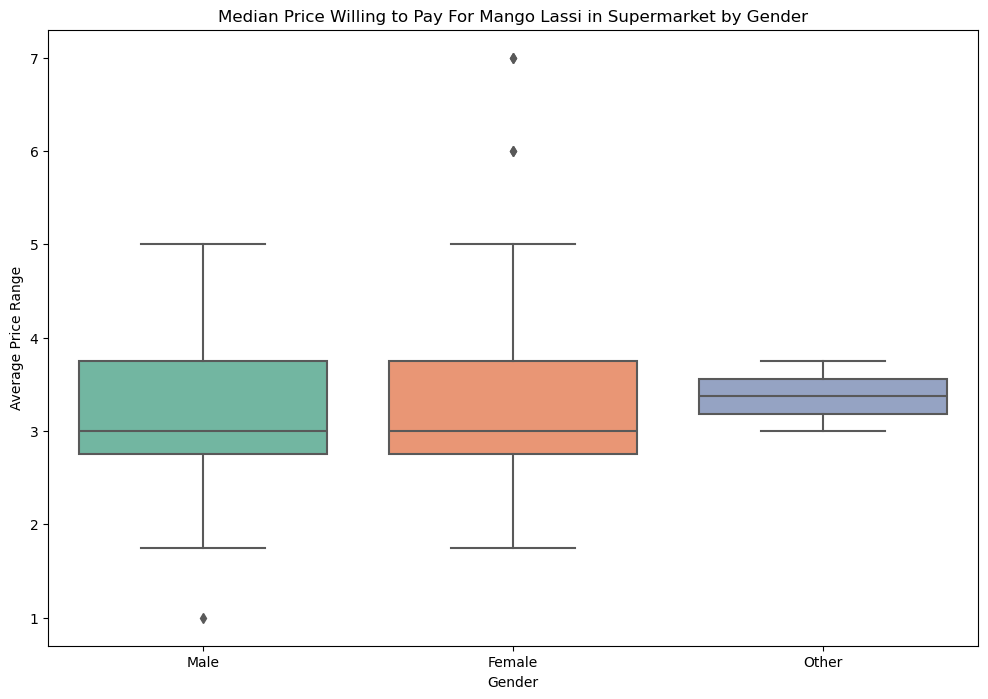

In [42]:
lower_threshold_col = 'If this Product is available in supermarket how much are you willing to pay?.1'
upper_threshold_col = 'If this Product is available in supermarket how much are you willing to pay?.2'
gender_col = 'Gender'

# Clean the data (convert columns to numeric, handle missing values)
data[lower_threshold_col] = pd.to_numeric(data[lower_threshold_col], errors='coerce')
data[upper_threshold_col] = pd.to_numeric(data[upper_threshold_col], errors='coerce')

# Drop rows with missing values in the price columns
data = data.dropna(subset=[lower_threshold_col, upper_threshold_col])

# Create a new column 'Price Range' by averaging the lower and upper thresholds
data['Price Range'] = (data[lower_threshold_col] + data[upper_threshold_col]) / 2

# Plotting the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x=gender_col, y='Price Range', palette='Set2')
plt.title('Median Price Willing to Pay For Mango Lassi in Supermarket by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Price Range')
plt.show()

In [44]:
data_2 = pd.read_excel(r'D:\Assignments&UNI\Mango Lassi Survey.xlsx', sheet_name= 'Sheet 1')

In [45]:
data_2.head()

,Timestamp,Gender,Age Group,Country,Ethnicity,Do you like to try different cuisine?,Do you like yogurt if yes then Dairy based or vegan?,Have you ever Heard about the Mango Lassi?,How much would you rate Mango Lassi ?,"Would you like to have Mango Lassi at different restaurants and if yes, would you like it with any particular cuisines?",Unnamed: 10,If this Product is available in supermarket how much are you willing to pay?,"Feedback on taste, texture, etc.",If this Product is available in supermarket how much are you willing to pay?.1,If this Product is available in supermarket how much are you willing to pay?.2,If this Product is available in supermarket how much are you willing to pay?.3
0,2024-05-18 15:56:08.048,Male,Below 18 Years,India,Indian,Yes,"Yes, Dairy",Yes,10,Yes,NaN,2.0,Sehr gut,2.0,2,2
1,2024-05-18 17:17:07.898,Female,45 - 60 Years,Austria,Austrian,Yes,"Yes, Vegan",Yes,10,"Yes,Italian",Italian,3.0,More fruit,3.0,3,3
2,2024-05-18 17:26:28.304,Male,45 - 60 Years,Europe,European,Yes,"Yes, Dairy",Yes,6,No,NaN,1.5,Pulver constience okay more flavour,1.5,2,2
3,2024-05-18 17:29:18.455,Female,18 - 30 Years,Switzerland,Swiss,Yes,"Yes, Dairy",Yes,9,Mexican spicy,Mexican spicy,3.0,Like,3.0,3,3
4,2024-05-18 17:31:50.183,Male,30 - 45 Years,Austria,Austrian,Yes,"Yes, Vegan",Yes,7,Any,Any,3.0,More mango taste,3.0,3,3


In [46]:
data_2['Age Group'].value_counts()

Age Group
18 - 30 Years         112
30 - 45 Years          58
45 - 60 Years          14
Below 18 Years         13
60 Years and above      3
Name: count, dtype: int64

In [47]:
world_maps= data_2['Country'].value_counts()


In [48]:
world_maps = data_2['Country']
world_maps

0            India
1          Austria
2           Europe
3      Switzerland
4          Austria
          ...     
195        Germany
196        Austria
197       Thailand
198          India
199          India
Name: Country, Length: 200, dtype: object

In [49]:
country_counts = data_2['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']
country_counts.value_counts()

Country                 Count
Afghanistan             1        1
Italy                   9        1
Latin America           2        1
Mexico                  2        1
Myanmar                 1        1
Nepal                   2        1
Netherlands             1        1
Pakistan                1        1
Philippines             1        1
Poland                  3        1
Romania                 2        1
Russia                  2        1
Serbia                  3        1
Slovenia                2        1
South Africa            1        1
Spain                   3        1
Switzerland             4        1
Syria                   2        1
Taiwan                  1        1
Thailand                10       1
Turkey                  2        1
Turkey-Austria          1        1
U.A.E                   3        1
UK-Ireland              1        1
USA                     1        1
Japan                   1        1
Iran                    1        1
Albania                 1

In [69]:
top_20_countries = country_counts.head(20)

### Here I tried to visualize the country data of our survey participants, focusing on the top 20, and around 60 nationalities answered the survey

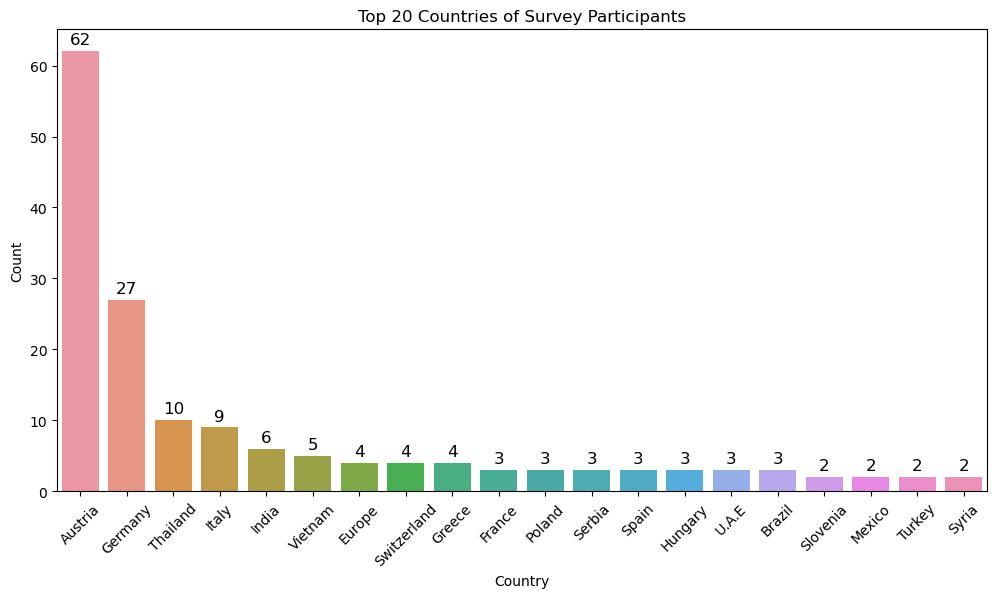

In [70]:
plt.figure(figsize=(12, 6))
ax= sns.barplot(data=top_20_countries, x='Country', y='Count')
for p in ax.patches:
    height = int(p.get_height())  # Convert height to integer
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Top 20 Countries of Survey Participants')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.show()

In [57]:
venn_diag= data_2['Do you like yogurt if yes then Dairy based or vegan?'].value_counts()
venn_diag

Do you like yogurt if yes then Dairy based or vegan?
Yes, Dairy           101
Yes, Dairy, Vegan     66
Yes, Vegan            20
No                     5
No, Vegan              2
Yes                    1
No, Dairy, Vegan       1
Dairy, Vegan           1
Name: count, dtype: int64

### This visual is data about the yoghurt preferences people had, 66 people said that they like it in both dairy and vegan base, 101 said only dairy and 20 said only vegan.

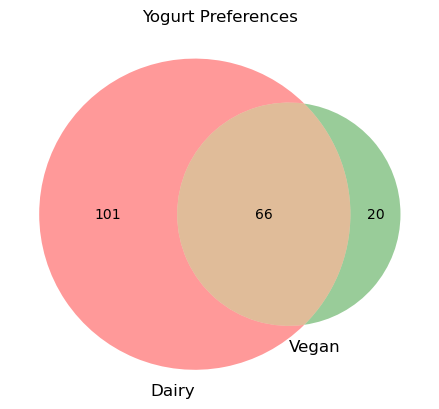

In [61]:
only_dairy = venn_diag.get('Yes, Dairy', 0)
only_vegan = venn_diag.get('Yes, Vegan', 0)
both = venn_diag.get('Yes, Dairy, Vegan', 0)

# Create the Venn diagram
venn2(subsets=(only_dairy, only_vegan, both), set_labels=('Dairy', 'Vegan'))

# Customize the plot
plt.title("Yogurt Preferences")
plt.show()

In [63]:
rate = pd.DataFrame(data_2['How much would you rate Mango Lassi ?'])
rate = rate.value_counts().reset_index()
rate.columns=['rate','Count']
rate

,rate,Count
0,9,62
1,10,47
2,8,44
3,7,37
4,6,8
5,5,2


### This plot is why TasteAtlas calls mango lassi THE BEST DAIRY BEVERAGE IN THE WORLD. 
#### 76.5% of the survey participants rated the drink above 7, And out of the 200 not a single person rated it below 5.

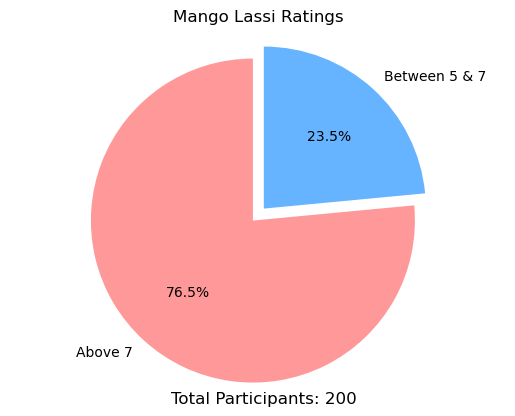

In [64]:
rate = pd.DataFrame(data['How much would you rate Mango Lassi ?'], columns=['How much would you rate Mango Lassi ?'])
rate = rate['How much would you rate Mango Lassi ?'].value_counts().reset_index()
rate.columns = ['rate', 'Count']

# Splitting the data into two categories
above_7 = rate[rate['rate'] > 7]['Count'].sum()
between_5_and_7 = rate[(rate['rate'] >= 5) & (rate['rate'] <= 7)]['Count'].sum()

# Data for pie chart
labels = ['Above 7', 'Between 5 & 7']
sizes = [above_7, between_5_and_7]
explode = (0.1, 0)
# Creating the pie chart
fig, ax = plt.subplots()
ax.pie(sizes,explode, labels=labels,autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
total_participants = 200
plt.annotate(f'Total Participants: {total_participants}', xy=(0, -1), xytext=(0, -1.2),
             ha='center', fontsize=12, color='black')

# Adding title
plt.title('Mango Lassi Ratings')
plt.show()

## Overall, the survey underscores the strong appeal of Mango Lassi across different demographics and nationalities. The insights gained from this project can inform marketing strategies, pricing decisions, and product development to better cater to consumer preferences and expand the market for Mango Lassi.

## By leveraging data visualization techniques, we were able to uncover these insights effectively and provide a clear picture of the current landscape for Mango Lassi in Vienna. This project not only enhanced our understanding of consumer preferences but also showcased the power of data-driven decision-making in the food and beverage industry.